In [ ]:
#En este ejemplo utilizaremos el algoritmo de retropropagación en redes neuronales para aprender los parámetros de la red y
#poder reconocer dígitos escritos a mano.

In [105]:
#Configuraciones iniciales
options(scipen = 999, repr.plot.width=8, repr.plot.height= 6, warn = -1)

In [93]:
#Instalación y carga de paquetes necesarios
list.of.packages <- c('R.matlab', 'fields', 'ggmap', 'gridExtra')

new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "https://cran.r-project.org")

library(R.matlab)
library(fields)
library(ggmap)
library(gridExtra)

In [4]:
#Carga de datos

digits <- as.data.frame(readMat('ex3data1.mat')) #valores de los pixeles de los digitos a reconocer
weights <- readMat('ex3weights.mat') #pesos para la red neuronal


X <- as.matrix(digits[, 1:400])
y <- digits[, 401]
Theta1 <- weights[[1]]
Theta2 <- weights[[2]]

str(X)
str(y)

 num [1:5000, 1:400] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:400] "X.1" "X.2" "X.3" "X.4" ...
 num [1:5000] 10 10 10 10 10 10 10 10 10 10 ...


rescaling mat to [0,1]...


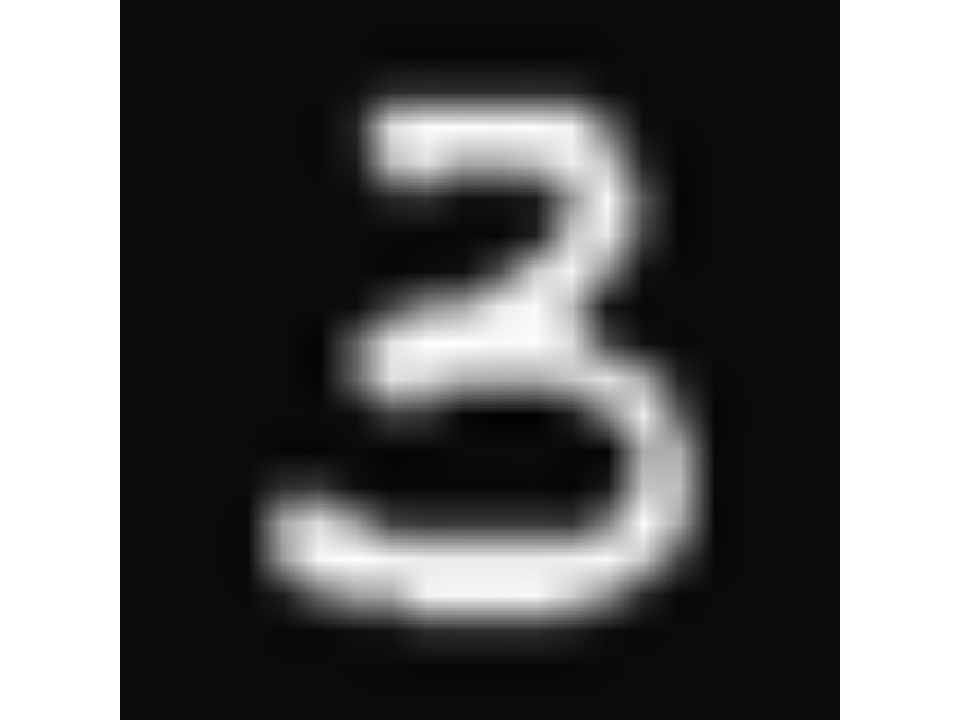

In [109]:
idx <- sample(1:nrow(X), 1)
aux <- matrix(X[idx,], 20, 20)
ggimage(aux, scale_axes = TRUE)

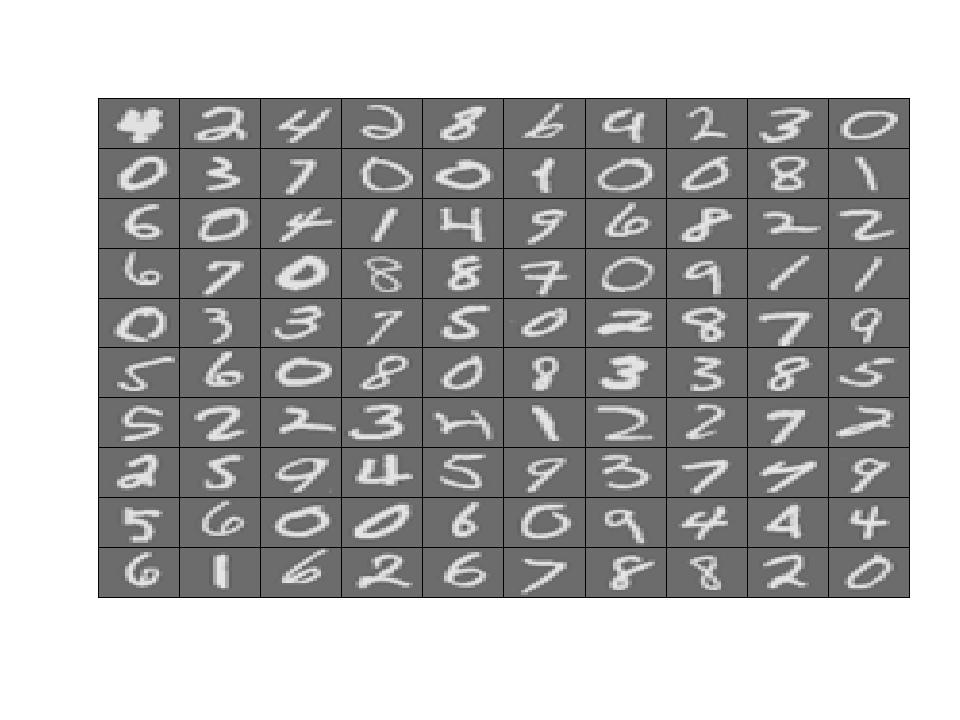

In [106]:
#Visualizamos una muestra del dataset

m <- nrow(X)
rand_indices <- sample(m, 100)
sel <- X[rand_indices, ]

visualizarDigitos <- function(X) {
    
    
    example_width <- round(sqrt(dim(X)[2]))
    
    if (is.vector(X))
        X <- t(X)
  
    # Calcular número de filas y columnas
    m <- dim(X)[1]
    n <- dim(X)[2]

    example_height <- (n / example_width) #altura en pixeles de c/imagen

    # Cantidad de observaciones a mostrar
    display_rows <- floor(sqrt(m)) #10
    display_cols <- ceiling(m / display_rows) #10
           
    # Espaciado entre dígitos
    pad <- 1

    display_array <- -matrix(0,pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad))
    curr_ex <- 1

    for (j in 1:display_rows) {
        for (i in 1:display_cols) {
          if (curr_ex > m)
            break
      
          max_val <- max(abs(X[curr_ex,]))
          display_array[pad + (j - 1) * (example_height + pad) + (1:example_height), pad + (i - 1) * (example_width + pad) + 
                        (1:example_width)] <- matrix(unlist(X[curr_ex,]), example_height, example_width) / max_val
          curr_ex <- curr_ex + 1
        }
    
        if (curr_ex > m)
          break
    }

    # Mostrar imagen
    #op <- par(bg = "gray")

    #La imagen se dibuja por fila de abajo a arriba, pero R indexa las matrices por columnas, de arriba a abajo
    dispArr <- t(apply(display_array,2,rev))

    image(z = dispArr, col = gray.colors(100), xaxt = 'n', yaxt = 'n')

    grid(nx = display_cols, display_rows, col = 'black', lwd = 1, lty = 1)
    box()
    #par(op)
    
}
        

visualizarDigitos(sel)

In [110]:
#Inicializamos algunos parámetros

input_layer_size <- 400
hidden_layer_size <- 25
num_labels <- 10
nn_params <- c(c(Theta1), c(Theta2))
lambda <- 0

In [111]:
#Construimos las funciones para calcular el costo y los gradientes de la red neuronal

nnCostFunction <- function(nn_params) {
    
    Theta1 <- matrix(nn_params[1:(hidden_layer_size *(input_layer_size + 1))], hidden_layer_size, input_layer_size +1)
    Theta2 <- matrix(nn_params[(1 + hidden_layer_size * (input_layer_size + 1)):length(nn_params)], 
                     num_labels, hidden_layer_size +1)
    
    m <- nrow(X)
    J <- 0
    
    
}

[1] 10285